In [1]:
import os
import sys
from collections import defaultdict
from functools import reduce, partial

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
PATH_TO_RAW_SARS = "../data/raw/sars-cov-2_ff_mutspec_192comp.csv"

In [3]:
rawms = pd.read_csv(PATH_TO_RAW_SARS)
rawms.head()

,Unnamed: 0,NucSubst,ObsFr,ExpFr,RawMutSpec,MutSpec
0,1,AAA>ACA,NaN,NaN,0.0,0.0
1,2,AAA>AGA,NaN,NaN,0.0,0.0
2,3,AAA>AUA,NaN,NaN,0.0,0.0
3,4,AAC>ACC,NaN,NaN,0.0,0.0
4,5,AAC>AGC,NaN,NaN,0.0,0.0


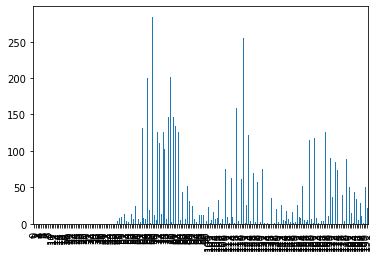

In [4]:
rawms.RawMutSpec.plot.bar();

## Rude approach

Strand:
- 1 - (+)
- 0 - (-)

In [45]:
ms = rawms[["NucSubst"]]
ms["Strand"] = ms.NucSubst.str.get(1).isin(["T", "C", "U"]).astype(int)
ms["sars_cov_2_full"] = rawms.RawMutSpec
ms["sars_cov_2_plus"]  = ms["sars_cov_2_full"]
ms["sars_cov_2_minus"] = ms["sars_cov_2_full"]
ms.sars_cov_2_plus.at[ms.Strand == 0] = 0
ms.sars_cov_2_minus.at[ms.Strand == 1] = 0

ms.tail()

,NucSubst,Strand,sars_cov_2_full,sars_cov_2_plus,sars_cov_2_minus
187,UUG>UCG,1,28.480000,28.480000,0.0
188,UUG>UGG,1,11.080000,11.080000,0.0
189,UUU>UAU,1,1.211921,1.211921,0.0
190,UUU>UCU,1,50.344371,50.344371,0.0
191,UUU>UGU,1,21.357616,21.357616,0.0


In [46]:
ms.drop("Strand", axis=1, inplace=True)

ms.to_csv("../data/sars-cov-2_192.csv", index=None)

## Math problem

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Bayes%27_Theorem_MMB_01.jpg/1920px-Bayes%27_Theorem_MMB_01.jpg" width=200x>

**Division of mutational spectra**

$P(m|S)=\frac{P(S|m)P(m)}{P(S)}$

$P(m|S) -$ Mutational spectra of each strand - we need to estimate this entity;

$P(S|m) -$ Shares of the mutations on each strand - if we observe mutation *m* (e.g. C>T) strand could be heavy or light (plus or minus for viruses) with some probabilities;<br>
$P(m) -$ Overall mutational spectra (12 numbers) - already calculated;<br>
$P(S) -$ Shares of each strand in the cells/ordanoids (DMVs)

For mtDNA:<br>
$P(S) = 0.5$<br>
$P(S|m) -$ need to consider nucleotide frequencies and basic mutational rate of heavy and light chains (KP knows papers that demonstrate this effect, maybe they estimate mutational rate bias)

For Coronavirus:<br>
$P(S) = X$ - we should find X estimation of strand representation in papers<br>
$P(S|m) -$ need to consider nucleotide frequencies and (-)strand states (paired, low amount of free (-)strand)